<a href="https://colab.research.google.com/github/morae00/AIB_TP1/blob/KKU/binary_classification_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the data
data = pd.read_csv('/content/binary_classification_data.csv')

# Separate features and target
X = data.iloc[:, 0:8]
y = data.iloc[:, 8:]

# Preprocessing
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode the labels
encoder = LabelEncoder()
y_encoded = y.apply(encoder.fit_transform)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test

(array([[-0.09022001,  0.14188787, -0.26933219, ..., -0.427166  ,
          0.03655185, -0.19453848],
        [ 0.4083358 ,  0.63712211, -0.37100979, ..., -0.7568599 ,
          1.30417781,  1.29572826],
        [-0.42157536, -0.40049057, -0.23004455, ..., -0.6446726 ,
          1.29713174,  1.03788877],
        ...,
        [ 0.19301573, -0.48745959,  0.17443298, ..., -0.75492264,
          1.94223801,  1.94670521],
        [ 0.95836132,  0.49455191, -0.53363932, ..., -0.24781729,
         -0.20088061, -0.39924014],
        [ 0.37605301,  0.57324651, -0.12375746, ..., -0.74647617,
          2.07694995,  2.10953909]]),
 array([[ 2.27125837e-01,  3.46496269e-01, -2.74255824e-01, ...,
         -4.41160792e-01, -4.01546152e-02, -2.44520907e-01],
        [-1.38366319e+00, -1.77747776e+00,  1.45453625e+00, ...,
         -2.27501762e-01, -2.78601190e-01, -4.59846006e-01],
        [-3.04321857e-01,  6.53363384e-02,  2.48474997e-02, ...,
         -5.49765445e-01,  2.27907256e-01,  2.60284223e-

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization

from tensorflow.keras import backend as K
from tensorflow.keras.metrics import Precision, Recall

class F1Score(tf.keras.metrics.Metric):

    def __init__(self, name='f1_score', **kwargs):
        super().__init__(name=name, **kwargs)
        self.precision = tf.keras.metrics.Precision()
        self.recall = tf.keras.metrics.Recall()

    def update_state(self, y_true, y_pred, sample_weight=None):
        self.precision.update_state(y_true, y_pred, sample_weight)
        self.recall.update_state(y_true, y_pred, sample_weight)

    def result(self):
        precision = self.precision.result()
        recall = self.recall.result()
        return 2 * ((precision * recall) / (precision + recall + K.epsilon()))

    def reset_states(self):
        self.precision.reset_states()
        self.recall.reset_states()

from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout


# Define the model
model = Sequential([
    Dense(64, activation='relu', input_dim=8, kernel_regularizer=regularizers.l1(0.01)),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l1(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(16, activation='relu', kernel_regularizer=regularizers.l1(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(8, activation='relu', kernel_regularizer=regularizers.l1(0.01)),
    BatchNormalization(),
    Dense(1, activation='sigmoid')
])


# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', Precision(), Recall(), F1Score()])


# Define the early stopping criteria
early_stopping = EarlyStopping(monitor='f1_score', patience=30)

# Train the model
history = model.fit(X_train, y_train, epochs=1000, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model
loss, accuracy, Precision, Recall, F1Score = model.evaluate(X_test, y_test)

print("Test Accuracy: ", accuracy)
print("Test Precision: ", Precision)
print("Test Recall: ", Recall)
print("Test f1score: ", F1Score)

# Make predictions
predictions = model.predict(X_test)

Epoch 1/1000
441/448 [============================>.] - ETA: 0s - loss: 2.4807 - accuracy: 0.8741 - precision_2: 0.3895 - recall_2: 0.6454 - f1_score: 0.4858

/usr/local/lib/python3.10/dist-packages/keras/engine/training.py:2448: UserWarning: Metric F1Score implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()


448/448 [==============================] - 5s 5ms/step - loss: 2.4594 - accuracy: 0.8754 - precision_2: 0.3926 - recall_2: 0.6464 - f1_score: 0.4885 - val_loss: 0.9981 - val_accuracy: 0.9425 - val_precision_2: 0.9915 - val_recall_2: 0.3614 - val_f1_score: 0.5297
Epoch 2/1000
448/448 [==============================] - 2s 5ms/step - loss: 0.6113 - accuracy: 0.9537 - precision_2: 0.8058 - recall_2: 0.6548 - f1_score: 0.7225 - val_loss: 0.4440 - val_accuracy: 0.9103 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00 - val_f1_score: 0.0000e+00
Epoch 3/1000
448/448 [==============================] - 2s 6ms/step - loss: 0.2963 - accuracy: 0.9623 - precision_2: 0.8762 - recall_2: 0.6874 - f1_score: 0.7704 - val_loss: 0.1947 - val_accuracy: 0.9782 - val_precision_2: 0.9293 - val_recall_2: 0.8193 - val_f1_score: 0.8709
Epoch 4/1000
448/448 [==============================] - 2s 4ms/step - loss: 0.2033 - accuracy: 0.9689 - precision_2: 0.9045 - recall_2: 0.7398 - f1_score: 0.8139 - val_loss:

/usr/local/lib/python3.10/dist-packages/keras/engine/training.py:2448: UserWarning: Metric F1Score implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()


112/112 [==============================] - 0s 3ms/step - loss: 0.1248 - accuracy: 0.9774 - precision_2: 0.9545 - recall_2: 0.7850 - f1_score: 0.8615
Test Accuracy:  0.9773743152618408
Test Precision:  0.9545454382896423
Test Recall:  0.7850467562675476
Test f1score:  0.8615384697914124
112/112 [==============================] - 0s 2ms/step


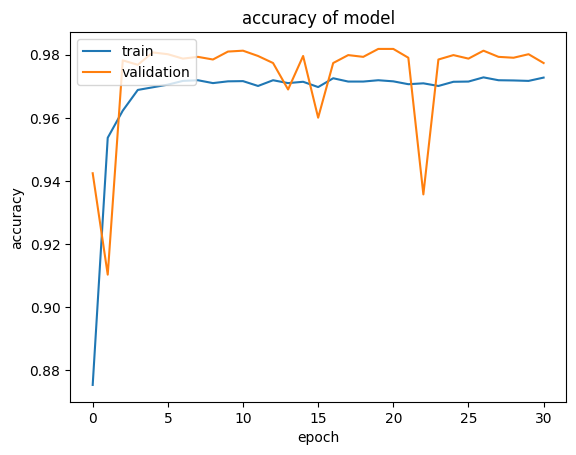

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy of model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

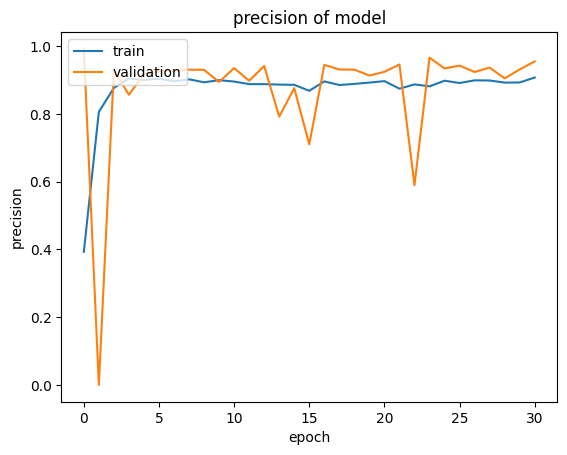

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['precision_2'])
plt.plot(history.history['val_precision_2'])
plt.title('precision of model')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

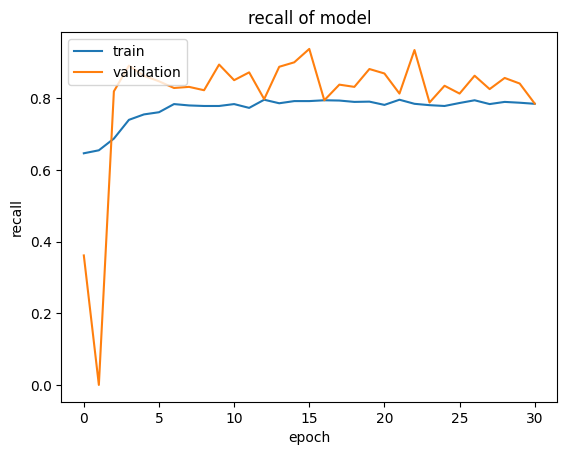

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['recall_2'])
plt.plot(history.history['val_recall_2'])
plt.title('recall of model')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

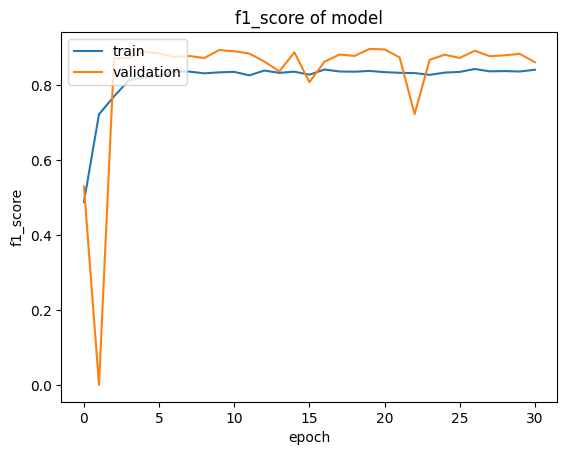

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title('f1_score of model')
plt.ylabel('f1_score')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## 2

In [37]:
class F1Score(tf.keras.metrics.Metric):

    def __init__(self, name='f1_score', **kwargs):
        super().__init__(name=name, **kwargs)
        self.precision = tf.keras.metrics.Precision()
        self.recall = tf.keras.metrics.Recall()

    def update_state(self, y_true, y_pred, sample_weight=None):
        self.precision.update_state(y_true, y_pred, sample_weight)
        self.recall.update_state(y_true, y_pred, sample_weight)

    def result(self):
        precision = self.precision.result()
        recall = self.recall.result()
        return 2 * ((precision * recall) / (precision + recall + K.epsilon()))

    def reset_states(self):
        self.precision.reset_states()
        self.recall.reset_states()

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_dim=8),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(32, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])


# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
              loss='binary_crossentropy',
              metrics=['accuracy', 'Precision', 'Recall', F1Score()])


# Define the early stopping criteria
early_stopping = EarlyStopping(monitor='val_f1_score', patience=50)

# Train the model
history = model.fit(X_train, y_train, epochs=1000, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model
loss, accuracy, Precision, Recall, F1Score = model.evaluate(X_test, y_test)

print("Test Accuracy: ", accuracy)
print("Test Precision: ", Precision)
print("Test Recall: ", Recall)
print("Test f1score: ", F1Score)

# Make predictions
predictions = model.predict(X_test)

Epoch 1/1000
448/448 [==============================] - ETA: 0s - loss: 0.1593 - accuracy: 0.9691 - precision: 0.9260 - recall: 0.7215 - f1_score: 0.8111

/usr/local/lib/python3.10/dist-packages/keras/engine/training.py:2448: UserWarning: Metric F1Score implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()


448/448 [==============================] - 4s 4ms/step - loss: 0.1593 - accuracy: 0.9691 - precision: 0.9260 - recall: 0.7215 - f1_score: 0.8111 - val_loss: 0.0705 - val_accuracy: 0.9788 - val_precision: 0.9298 - val_recall: 0.8255 - val_f1_score: 0.8746
Epoch 2/1000
448/448 [==============================] - 2s 3ms/step - loss: 0.0744 - accuracy: 0.9783 - precision: 0.9199 - recall: 0.8369 - f1_score: 0.8764 - val_loss: 0.0674 - val_accuracy: 0.9799 - val_precision: 0.9462 - val_recall: 0.8224 - val_f1_score: 0.8800
Epoch 3/1000
448/448 [==============================] - 1s 3ms/step - loss: 0.0705 - accuracy: 0.9794 - precision: 0.9231 - recall: 0.8467 - f1_score: 0.8833 - val_loss: 0.0642 - val_accuracy: 0.9807 - val_precision: 0.9228 - val_recall: 0.8567 - val_f1_score: 0.8885
Epoch 4/1000
448/448 [==============================] - 2s 3ms/step - loss: 0.0688 - accuracy: 0.9795 - precision: 0.9224 - recall: 0.8483 - f1_score: 0.8838 - val_loss: 0.0667 - val_accuracy: 0.9804 - val_pre

/usr/local/lib/python3.10/dist-packages/keras/engine/training.py:2448: UserWarning: Metric F1Score implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()


112/112 [==============================] - 0s 2ms/step - loss: 0.0638 - accuracy: 0.9810 - precision: 0.9121 - recall: 0.8723 - f1_score: 0.8917
Test Accuracy:  0.9810056090354919
Test Precision:  0.9120520949363708
Test Recall:  0.8722741603851318
Test f1score:  0.8917196393013
112/112 [==============================] - 0s 1ms/step


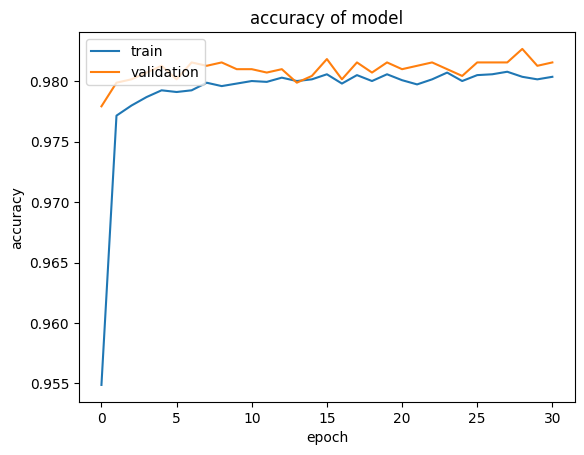

In [30]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy of model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

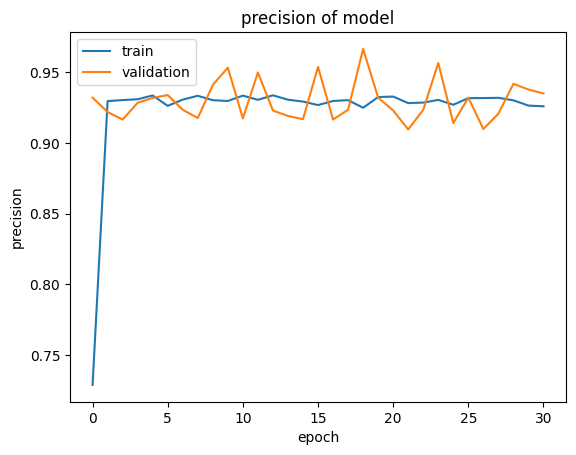

In [31]:
import matplotlib.pyplot as plt

plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])
plt.title('precision of model')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

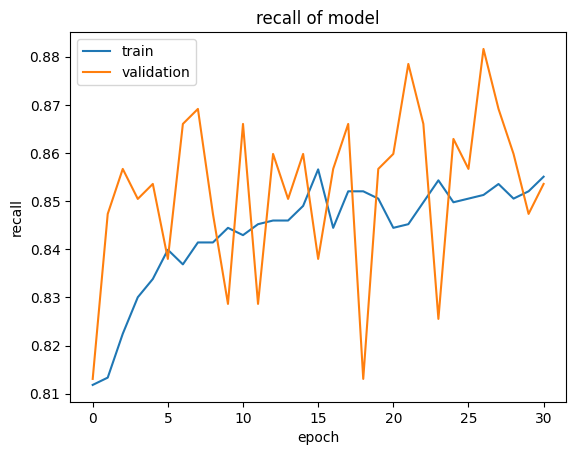

In [32]:
import matplotlib.pyplot as plt

plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.title('recall of model')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

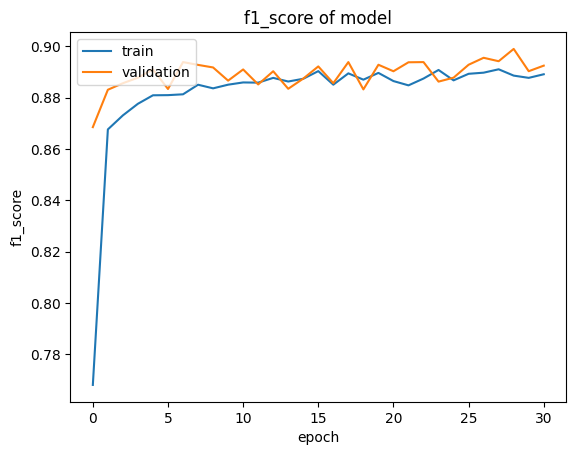

In [33]:
import matplotlib.pyplot as plt

plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title('f1_score of model')
plt.ylabel('f1_score')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()